# Problem 1A

In [84]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [85]:
df = pd.read_csv('SalaryData.csv')

In [86]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [87]:
df.tail()

,Education,Occupation,Salary
35,Bachelors,Exec-managerial,173935
36,Bachelors,Exec-managerial,212448
37,Bachelors,Exec-managerial,173664
38,Bachelors,Exec-managerial,212760
39,Doctorate,Exec-managerial,212781


In [88]:
df.Salary.describe()

count        40.000000
mean     162186.875000
std       64860.407506
min       50103.000000
25%       99897.500000
50%      169100.000000
75%      214440.750000
max      260151.000000
Name: Salary, dtype: float64

In [90]:
pd.crosstab(df['Salary'],df['Education']).mean()

Education
 Bachelors    0.375
 Doctorate    0.400
 HS-grad      0.225
dtype: float64

In [91]:
pd.crosstab(df['Salary'],df['Occupation']).mean()

Occupation
 Adm-clerical       0.250
 Exec-managerial    0.125
 Prof-specialty     0.325
 Sales              0.300
dtype: float64

In [92]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [95]:
formula = 'Salary ~ Education'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df        sum_sq       mean_sq         F        PR(>F)
Education   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual   37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [96]:
formula = 'Salary ~ Occupation'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
Occupation   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual    36.0  1.528092e+11  4.244701e+09       NaN       NaN


# Problem 1B:

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline

In [108]:
model = ols('Salary ~ C(Education) + C(Occupation)+C(Education) : C(Occupation)', data = df).fit()

In [113]:
sm.stats.anova_lm(model,typ=2)

C:\Users\Akansha Pruthi\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\Akansha Pruthi\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\Akansha Pruthi\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Education),9.482050e+10,2.0,66.674547,5.281201e-09
C(Occupation),4.705206e+08,3.0,0.220569,8.033952e-01
C(Education):C(Occupation),4.227791e+10,6.0,9.909463,1.323371e-05
Residual,2.062102e+10,29.0,NaN,NaN


In [ ]:
sns.set()
sns.pointplot(data=df, x='Occupation', y='Salary', hue='Education', dodge=True,capsize=.1,errwidth=1, palette='colorblind')

# Problem 2:

In [128]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [117]:
data = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [118]:
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [119]:
data.tail()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [122]:
data.shape

(777, 18)

In [123]:
data.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [125]:
data.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [126]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


# Univariate Analysis

C:\Users\Akansha Pruthi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Apps', ylabel='Density'>

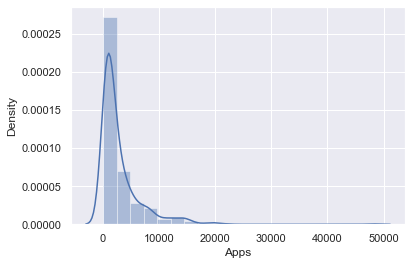

In [130]:
sns.distplot(data.Apps,bins=20)  # histogram of Apps

In [131]:
data.Apps.describe()

count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64

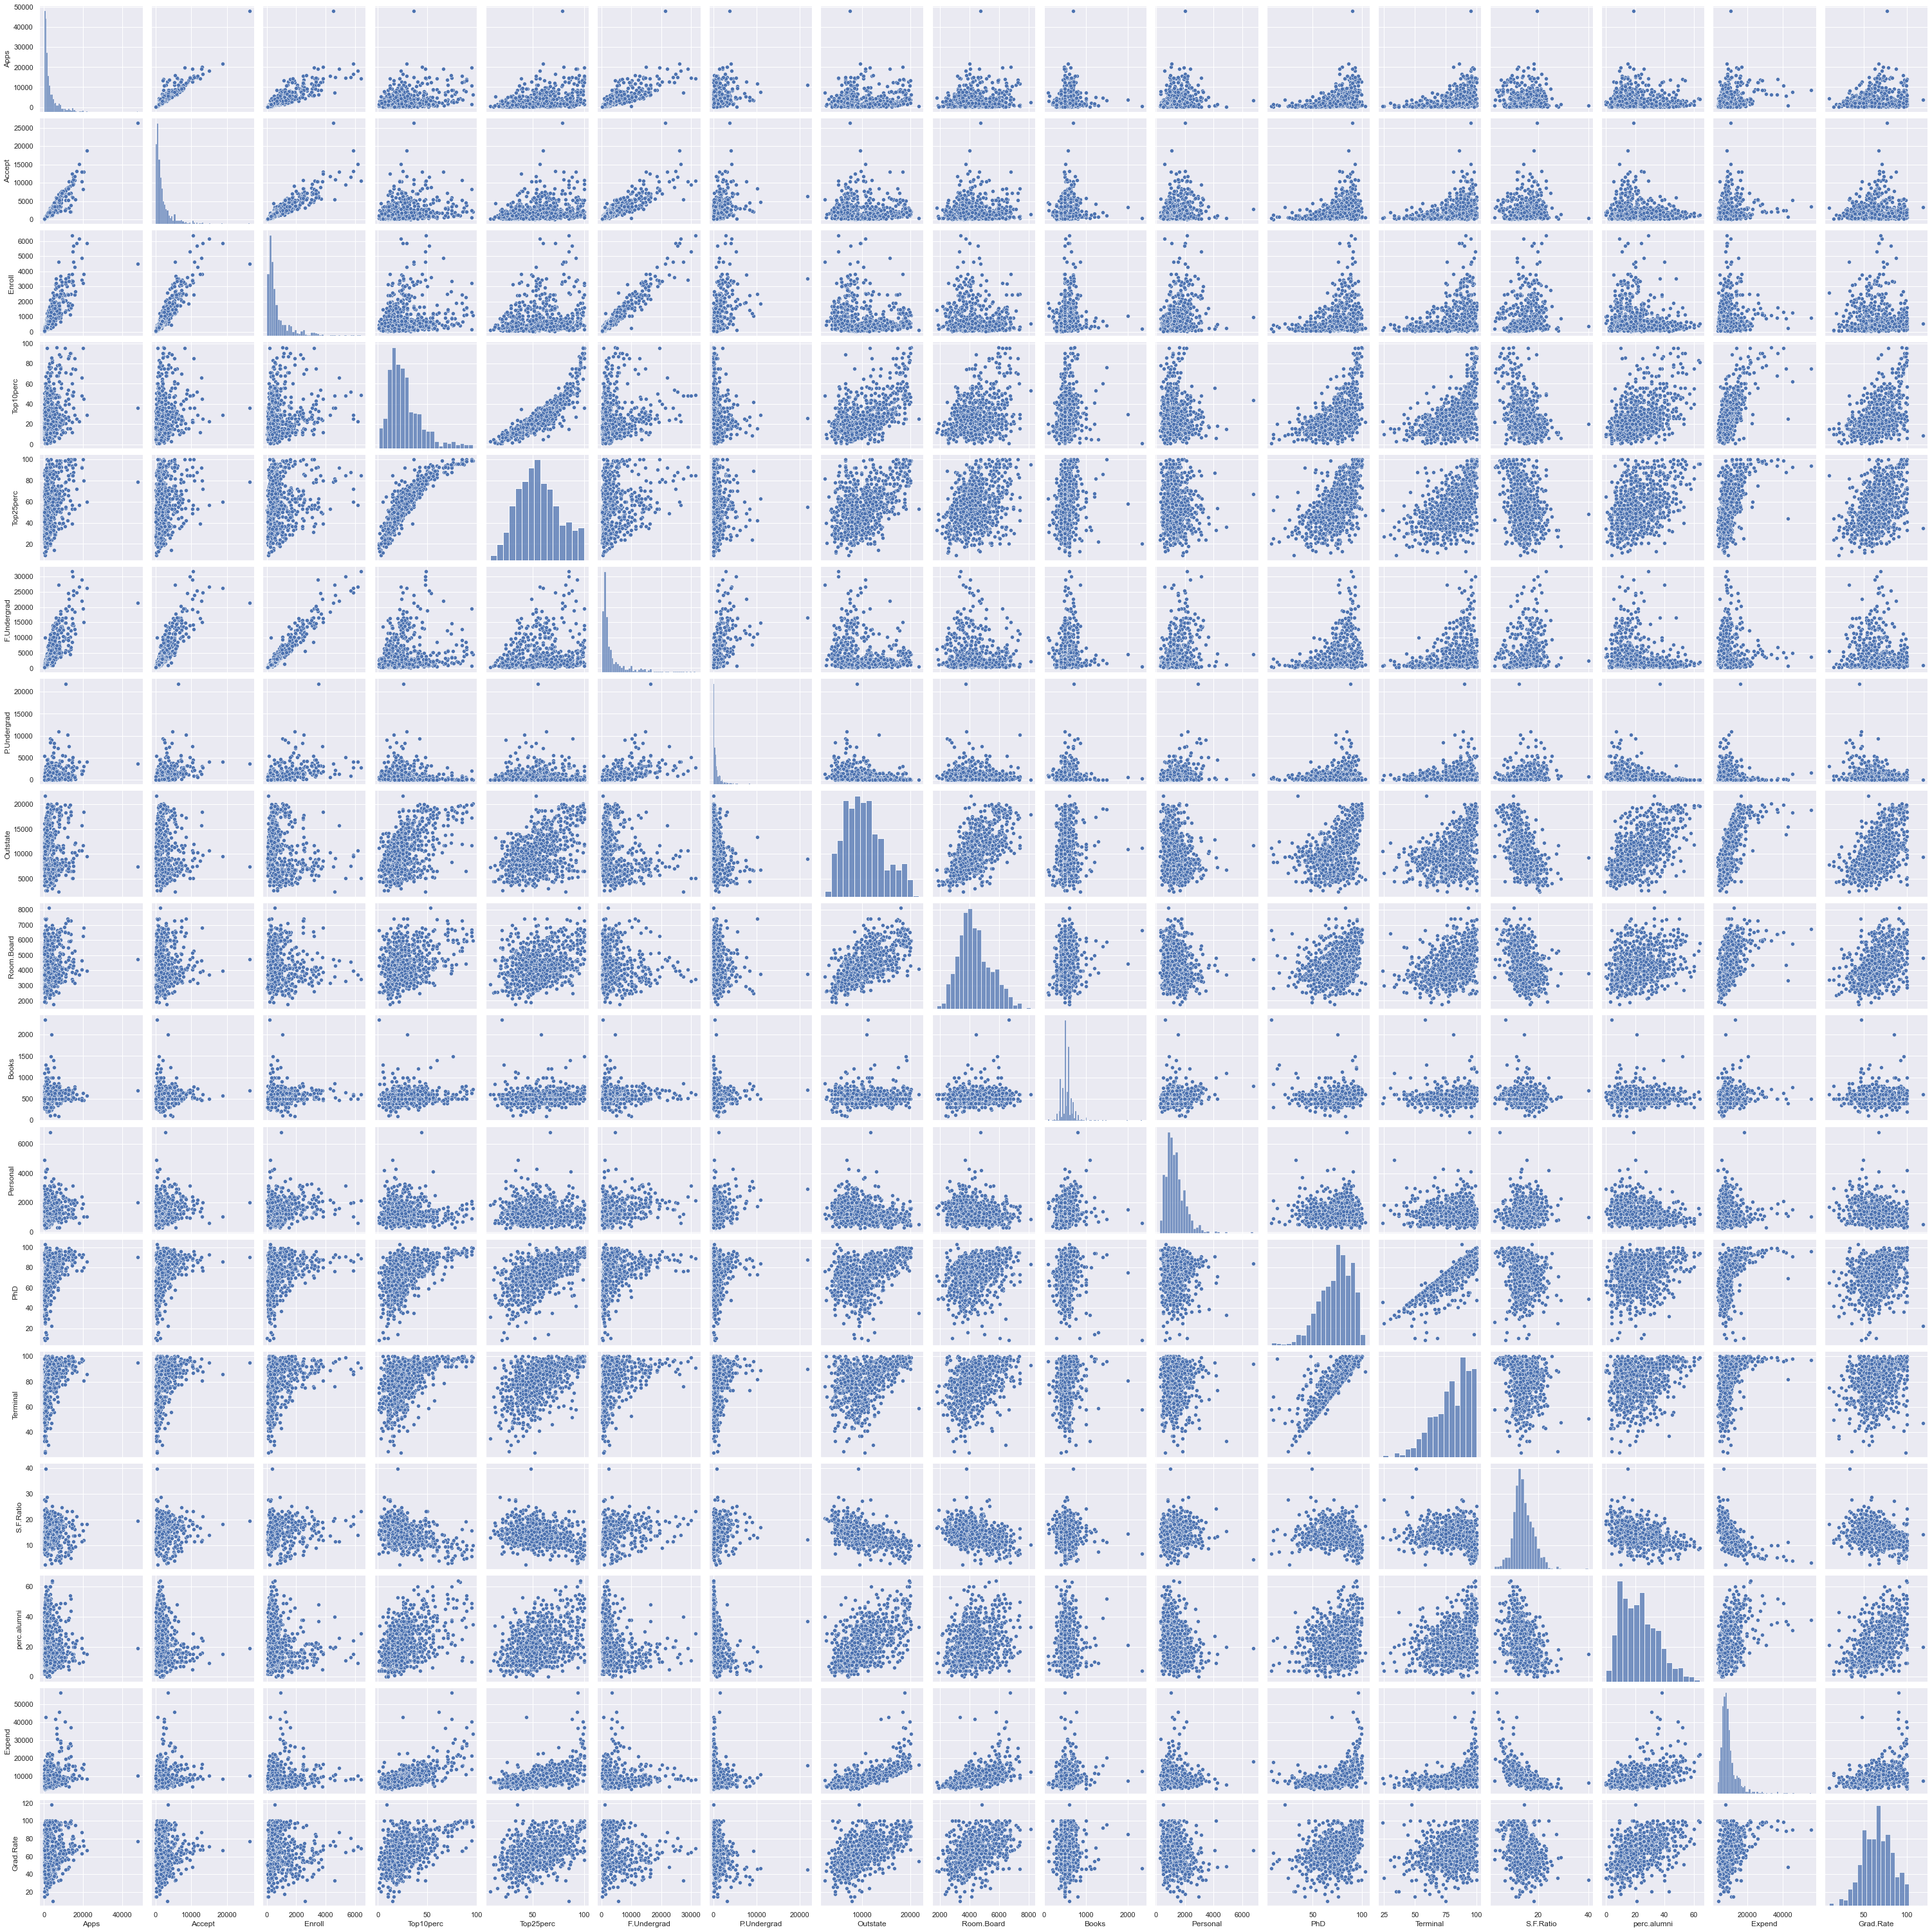

In [132]:
sns.pairplot(data)
plt.show()

In [133]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [136]:
df['Apps'] = std_scale.fit_transform(df[['Apps']])
df['Accept'] = std_scale.fit_transform(df[['Accept']])
df['Enroll'] = std_scale.fit_transform(df[['Enroll']])
df['Top10perc']= std_scale.fit_transform(df[['Top10perc']])
df['Top25perc'] = std_scale.fit_transform(df[['Top25perc']])

KeyError: "None of [Index(['Apps'], dtype='object')] are in the [columns]"

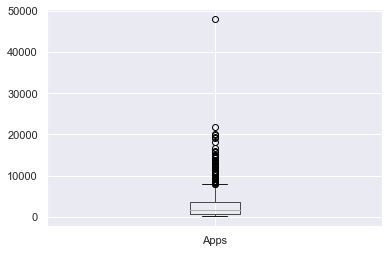

In [137]:
#checking the ouliers vefore scaling on Apps
data.boxplot(column=['Apps'])
plt.show()

In [150]:
df = data

In [153]:
df.drop("Names",inplace=True)

KeyError: "['Names'] not found in axis"